C:\Users\ronob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ronob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ronob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

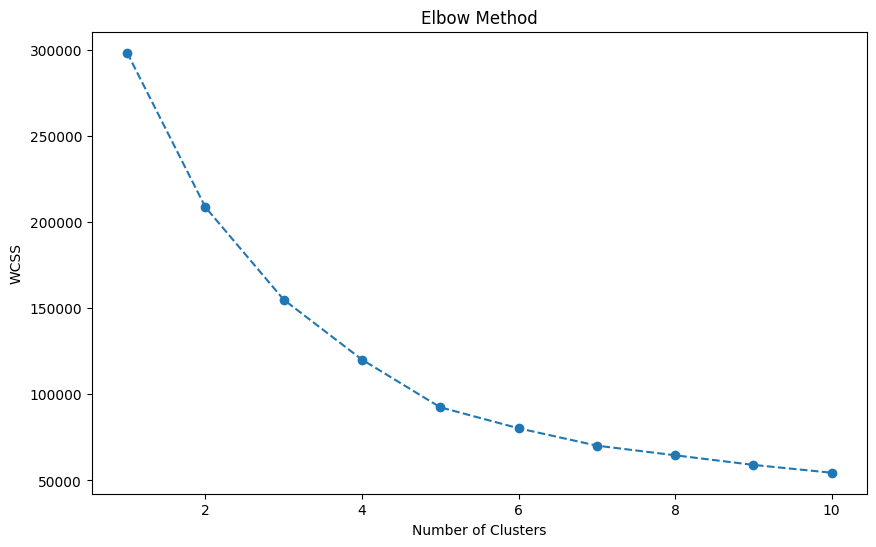

C:\Users\ronob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               age  quantity         price
cluster                                   
0        56.880107  2.687249   3419.236363
1        30.151902  2.690304   3330.462915
2        43.310656  4.331496  21741.128761


C:\Users\ronob\AppData\Local\Temp\ipykernel_9016\1288226464.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = data.groupby('cluster').mean()


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data=pd.read_csv(r'C:\Users\ronob\Desktop\NLP\Data-analysis-project\Mall  Sales Analysis\jupyter notebooks\Cleaned_Mall_Data.csv')

# Select relevant features for clustering 
selected_features = ['age', 'quantity', 'price']

# Subset the data with selected features
cluster_data = data[selected_features]

# Standardize the features
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(cluster_data_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# choose the optimal number of clusters
n_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add cluster labels to the original data
data['cluster'] = cluster_labels

# Analyze the results
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)


In [ ]:
# Count unique and repeated customer IDs
unique_customer_ids = data['customer_id'].nunique()
repeated_customer_ids = data['customer_id'].duplicated().sum()
percentage_repeated_ids = (repeated_customer_ids / unique_customer_ids) * 100

print("Total Unique Customer IDs:", unique_customer_ids)
print("Total Repeated Customer IDs:", repeated_customer_ids)
print("Percentage of Repeated Customer IDs:", percentage_repeated_ids)